<a href="https://colab.research.google.com/github/GabrielaRomoM/EjerciciosSYS-Python/blob/main/3FOURIER/Modulaci%C3%B3nAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MODULACIÓN POR AMPLITUD

El índice de modulación de AM es una medida de la variación de amplitud que rodea una portadora no modulada. Al igual que con otros índices de modulación, en AM esta cantidad (también llamada "profundidad de modulación") indica la variación introducida por la modulación respecto al nivel de la señal original. En AM, se refiere a las variaciones en la amplitud de la portadora y se define como:
h=Valor máximo de m(t)/A
Así que si h=0.5, la amplitud de la portadora varía en un 50 % por encima (y por debajo) de su nivel original; para h=1, la señal varía en un 100 %. Para evitar la distorsión, la profundidad de modulación no deberá exceder del 100 %. En sistemas de transmisión por lo general se incorporará un circuito limitador para asegurar cumplir este requisito. Sin embargo, los demoduladores de AM pueden ser diseñados para detectar la inversión de fase que se produce cuando la modulación excede el 100 %, y automáticamente corrige este defecto. A continuación se muestran unas imágenes en las que se pueden observar los resultados de modular con diferentes índices de modulación.
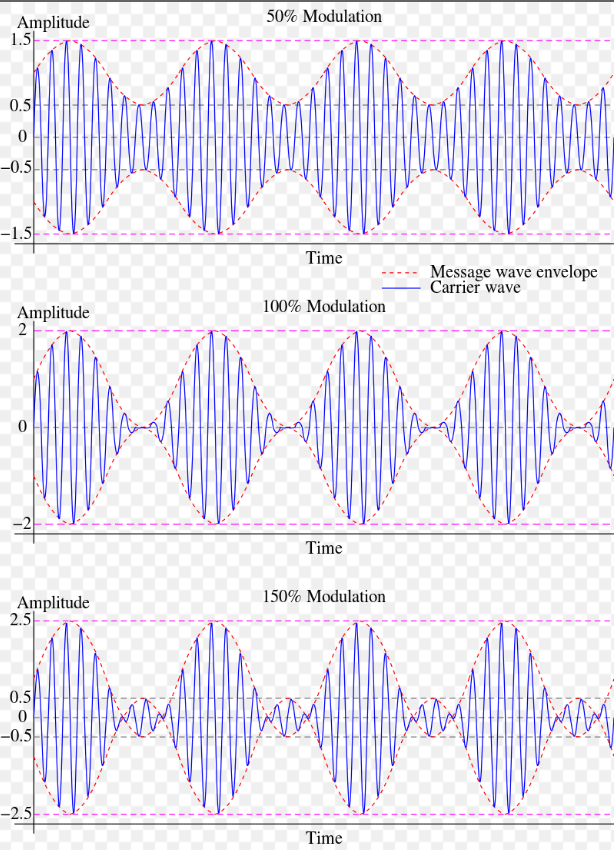

La AM es usada en la radiofonía, en las ondas medias, ondas cortas, e inclusoen laVHF:es utilizada en las comunicaciones radiales entre los aviones y lastorres de control de los aeropuertos. La llamada"Onda Media" (capaz de ser captada por la mayoría de los receptores de uso doméstico) abarca un rangode frecuencia que va desde 535 a 1705 kHz.
La AM también ha sido utilizada en el procesamiento de señales, particularmente en el campo de la producción musical, para generar diversos efectos de sonido. Probablemente, el efecto más popular de ellos es el tremolo (del inglés: trémolo), en el cual una onda portadora simple de baja frecuencia (generada por un LFO) y mantenida usualmente a una frecuencia fija menor a 20 Hz, es modulada por una señal de entrada. Este efecto de sonido puede encontrarse en amplificadores de guitarra, pedales de efectos, sintetizadores y complementos (plug-ins) para estaciones de trabajo de audio digital.

MODULACION AM

LIBRERIAS

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

ENTRADA DE LAS SEÑALES MENSAJE Y PORTADORA

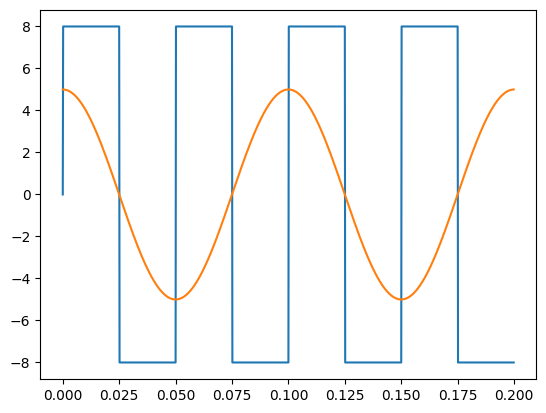

In [2]:
Fp = 200 #frecuencia portadora

fmr = 20 #frecuencia rectángulo
amr = 8 #amplitud rectángulo

fmc = 10 #frecuencia coseno
amc = 5 #amplitud coseno

ti = 0
tf = 0.2 #múltiplo de las frecuencias fundamentales de ambos mensajes

Fs = 30*Fp #Frecuencia muestreo

t = np.arange(ti,tf,1/Fs)
mr = amr*np.sign(np.sin(2*np.pi*fmr*t)) #señal cuadrada
mc = amc*np.cos(2*np.pi*fmc*t) #señal coseno
plt.plot(t,mr)
plt.plot(t,mc)

Ingrese el indice de modulación deseado [0,1]: 0.3


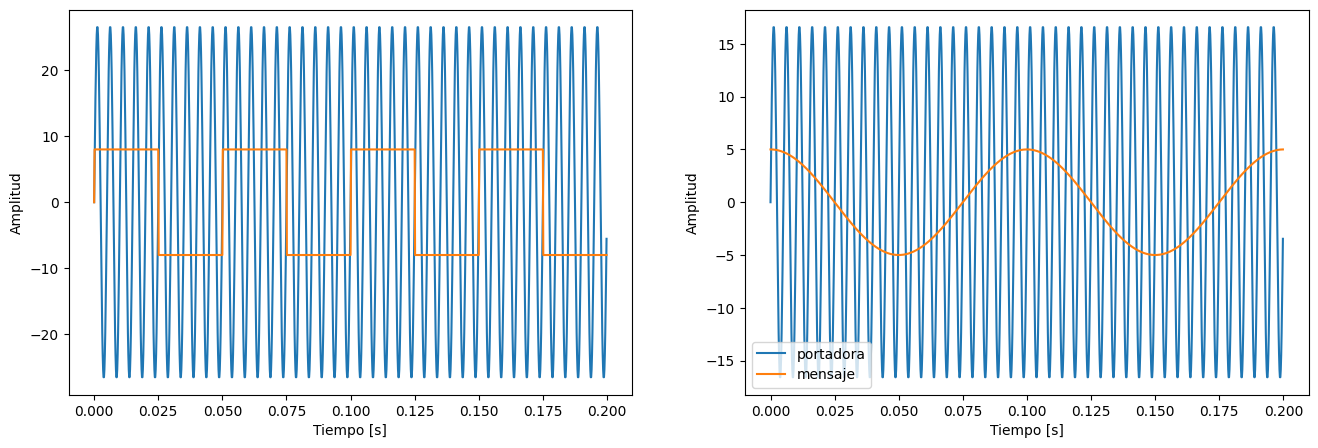

In [3]:
Im = float(input("Ingrese el indice de modulación deseado [0,1]: ")) #indice de modulación
apr = amr/Im #amplitud portadora de la rectangulo
apc = amc/Im #amplitud portadora de el coseno

spr = apr*np.sin(2*np.pi*Fp*t) #portadora rectangulo
spc = apc*np.sin(2*np.pi*Fp*t) #portadora coseno

plt.figure(figsize=(16,5))
plt.subplot(121)
plt.plot(t,spr,label='portadora')
plt.plot(t,mr,label='mensaje')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')

plt.subplot(122)
plt.plot(t,spc,label='portadora')
plt.plot(t,mc,label='mensaje')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')

plt.legend()

MODULACION

Text(0, 0.5, 'Amplitud')

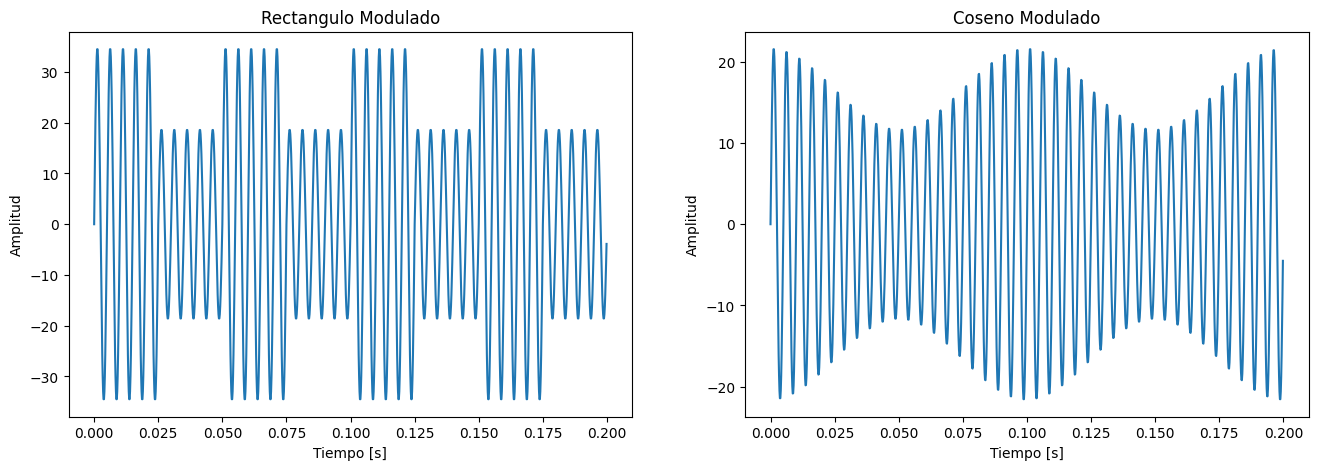

In [4]:
yr = (1+mr/apr)*spr #señal rectangulo modulada
yc = (1+mc/apc)*spc #señal coseno modulada

plt.figure(figsize=(16,5))
plt.subplot(121)
plt.title('Rectangulo Modulado')
plt.plot(t,yr)
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')

plt.subplot(122)
plt.title('Coseno Modulado')
plt.plot(t,yc)
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')

TRANSFORMADA DE FOURIER

In [5]:
#se debe realizar la transformada de 4 señales (2 mensajes y sus 2 portadoras)
TR = np.fft.rfft(mr) #Transformada rectangulo
TC = np.fft.rfft(mc) #Transformada coseno
TPR = np.fft.rfft(spr) #Transformada portadora r
TPC = np.fft.rfft(spc) #Transformada portadora c
TMR = np.fft.rfft(yr) #Tranformada modulacion r
TMC = np.fft.rfft(yc) #Transformada modulacion c

Vfreqr = np.fft.rfftfreq(len(spr),1/Fs)
Vfreqc = np.fft.rfftfreq(len(spc),1/Fs)

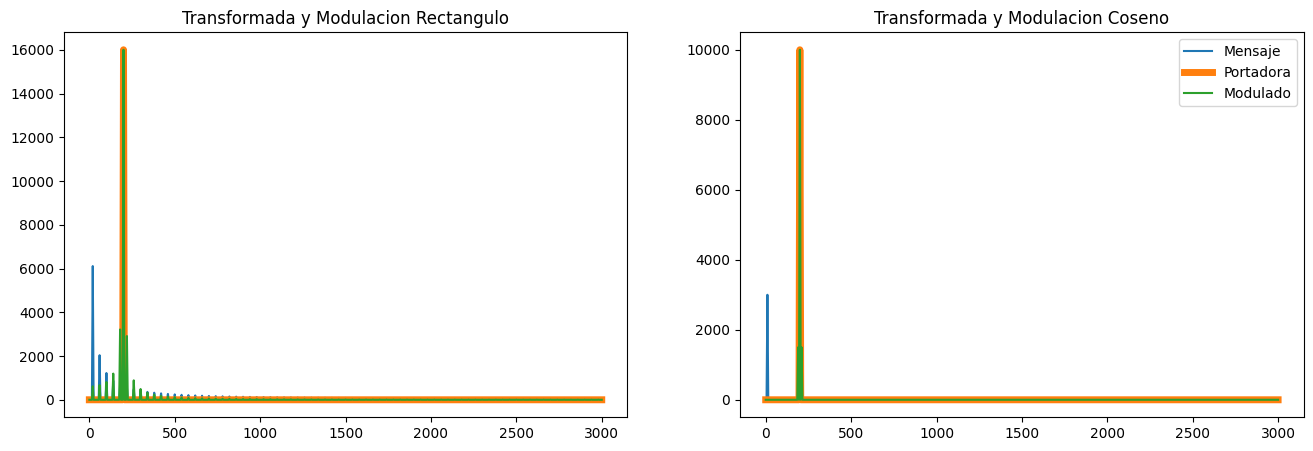

In [6]:
#Gráficas en la frecuencia
plt.figure(figsize=(16,5))

plt.subplot(121)
plt.title('Transformada y Modulacion Rectangulo')
plt.plot(Vfreqr,abs(TR),label='Mensaje')
plt.plot(Vfreqr,abs(TPR),label='Portadora', linewidth= 5)
plt.plot(Vfreqr,abs(TMR),label='Modulado')

plt.subplot(122)
plt.title('Transformada y Modulacion Coseno')
plt.plot(Vfreqc,abs(TC),label='Mensaje')
plt.plot(Vfreqc,abs(TPC),label='Portadora', linewidth= 5)
plt.plot(Vfreqc,abs(TMC),label='Modulado')

plt.legend()
plt.show()